# ** Introduction to Deep Learning **

**Required Reading**

[Ian Goodfellow's Deep Learning - Chapter 1, Section 6.2, and Section 8.1](https://www.deeplearningbook.org/contents/intro.html)

**Additional Reading/Viewing**

[Outstanding YouTube Series from 3 Blue 1 Brown](https://www.youtube.com/watch?v=aircAruvnKk)

---

**Recommended** [Jupyter Theme](https://github.com/dunovank/jupyter-themes) for viewing this notebook:

````
jt -t grade3 -cellw=90% -fs=14 -tfs=14 -ofs=14
````

**Recommended** [Jupyter Theme](https://github.com/dunovank/jupyter-themes) for presenting this notebook:

````
jt -t grade3 -cellw=90% -fs=20 -tfs=20 -ofs=20
````

---

## **Before We Start Stacking Layers...**

![](../graphics/cartoon-01.png)

- Deep learning is really hot right now, which might make deep learning sounds a little easier than it actually is. 
- Before we start just stacking neural network layers, let's discuss what deep learning is, how we're going to use tensorflow, think about how to intelligently learn from large datasets, and how we should measure our cost as we train. 
- After this, we'll be ready to begin **experimenting with deep models.**

---

![](../graphics/goodfellow_one_point_four.png)

**Deep Learning** has recently changed the landscape of computer vision (and other fields), and is largely responsible for a 3rd wave of interest and excitment about artificial intellgence. Deep learning is often understood/discussed as way to **learn data representations**.

---

![](../graphics/goodfellow_one_point_five-01.png)

- Compared to other methods we've learned in this class, **Deep Learning** will be the most data-based/empirical. We'll rely on deep learning to map all the way from **pixels to predictions.** 
- However, just becuase these models learn from data, this does not mean that working with them is as simple as sitting back and watching them learn. 
- There are still many knobs to turn, lots of pitfalls, and in some ways highly empirical techniques like **deep learning** present new challenges that we don't find with analytical solutions. Deep learning models can be really finicky, and take some time/patience/experimentation to really get right. 

---

Most deep learning models today involve some flavor of **artificial neural network**. In our neural network module, we discussed the history of neural networks, and basically left off with the development of the **backpropogation** algorithm in the 1980s. 

![](../graphics/rumerlhart_hinton-01.png)

- In 1986, Rumelhard, Hinton, and Williams showed in a [Nature Letter](http://www.cs.toronto.edu/~hinton/absps/naturebp.pdf), showed a method, backpropogation, that could be used to train multi layer neural networks. 
- The idea was not necessary unique to or invented by Rumelhard, Hinton, and Williams, but their work and this publication kicked off new reserach into neural networks. 

---

- Now, although Hinton put together many of the pieces required for modern deep learning in the 1980s, it would take some time for the the advances we see today to come about. 
- Let's get started by experimenting with some deep learning ideas. 
- Of course, to do some proper experimentation, we'll need some **data**. 

![](../videos/3b1b_mnist.gif)

- We'll start with the popular [mnist dataset](http://yann.lecun.com/exdb/mnist/). (Animation from 3 blue 1 brown's [Great series on deep learning](https://www.youtube.com/watch?v=aircAruvnKk))
- MNIST consists of 70,000 28x28 images of handwritten digits broken apart into 60,000 training and 10,000 testing images.
- Each image comes has been labeled with it's corresponding numerical value
- The images in the training set come from 250 unique writers, and the images in the test set come from a seperate set of 250 unique writers. 
- More information in [LeCun, Bottou, Bengio, and Haffner 1998](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf).
- [Great blog post from Christopher Olah on visualizing MNIST](http://colah.github.io/posts/2014-10-Visualizing-MNIST/).

---

## **Time for Tensorflow**

- To get started, we'll go ahead and hop in with the new tool we'll be using for this module, [Tensorflow](https://www.tensorflow.org/).
- Tensorflow is a really nice high level interface for machine learning. 
- You should be able to install tensorflow on your machine with `pip install tensorflow`, or if you have a newer Nvidia GPU and would like to use it, `pip install tensorflow-gpu`. 
- Getting the GPU version working will require some [additional steps](https://www.tensorflow.org/install/gpu), but does allow for large speedups on larger problems. However, CPU tensorflow will be just fine for the examples we'll cover here.

In [1]:
%pylab inline
import tensorflow as tf

Populating the interactive namespace from numpy and matplotlib


ModuleNotFoundError: No module named 'tensorflow'

Using tensorflow, we can automatically download the mnist dataset:

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data(
                                                        path='mnist.npz')

Let's get a feel for the data.

In [3]:
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [5]:
print(x_test.shape, y_test.shape)

(10000, 28, 28) (10000,)


In [6]:
print(x_train.dtype, y_train.dtype)

uint8 uint8


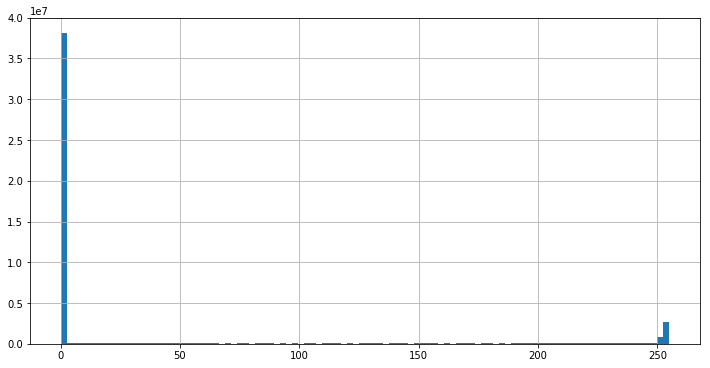

In [7]:
fig = figure(0, (12, 6))
hist(x_train.ravel(), 100);
grid(1)

Pixels are mostly black or white with some gray values scattered in the middle. 

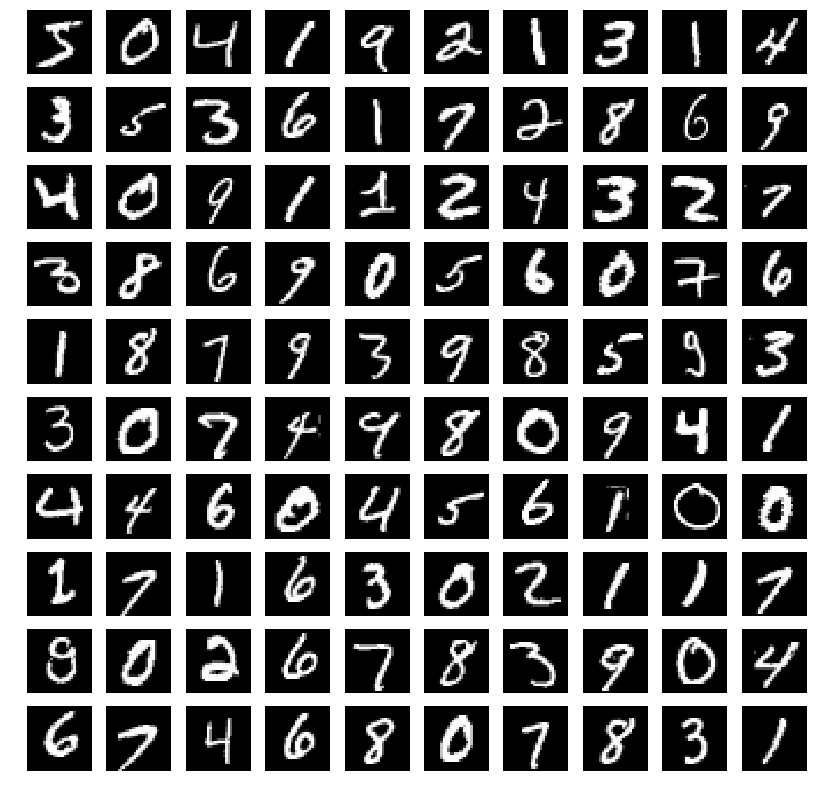

In [8]:
fig = figure(0, (14, 14))
for i in range(100):
    fig.add_subplot(10, 10, i+1)
    imshow(x_train[i, :, :], cmap = 'gray')
    axis('off')

## A Little Data Preprocessing

In [9]:
#Normalize Input Data between 0 and 1
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [10]:
#Unroll examples into one row for each example
x_train = np.reshape(x_train, (-1, 784))
x_test = np.reshape(x_test, (-1, 784))

In [11]:
x_train.shape

(60000, 784)

- The final data preprocessing step we need to take here is **one hot encoding** for our prediction targets. 
- Currently, our target values correspond to the numerical value of each handwritten digit:

In [12]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

- We could treat this is a continuous **regression problem**, and make the output of our neural network 1 dimensional and try to predict these quantities directly, however this appraoch does not work well in practice - our network would struggle to learn. 
- Part of the reason for this is that if we treat this problem as a regression problem, we're imposing **ordinality** in our predictions. 
- For example, if we used the root mean square error between our predictions and targets, would be penalized in a weird inconsistent manner. If our prediction target is 4 and our network predicts 5, this would be penalized less than predicting a 9. However, 5 and 10 are equally wrong. Our loss function does not reflect what we would like our network to learn.
- This really a **classification problem** with 10 discrete classes.
- **one hot encoding** provides a nice solution to this problem, by expanding the dimension of our prediction targets - creating one dimension for each discrete class we would like to predict.

In [13]:
#use built in one-hot encoding converter:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [14]:
y_train[:5, :]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

- What are the handwritten digit values for each row in the one-hot-encoded matrix above?

![](../graphics/spacer_small.png)

---

## **Learning Time**
- Alright, we have some data, we have tensorflow, let's see if we can train a model to predict the correct labels for our images. 
- TensorFlow uses a dataflow graph to represent your computation in terms of the dependencies between individual operations. This leads to a low-level programming model in which you first define the dataflow graph, then create a TensorFlow session to run parts of the graph across a set of local and remote devices. ([Description From Tensorflow Graphs and Sessions Guide](https://www.tensorflow.org/guide/graphs)).
- Nodes represent computations and edges represent dataflow. 


![](../videos/tensors_flowing.gif)

- We'll start with [a tensorflow placeholder](https://www.tensorflow.org/api_guides/python/reading_data#Feeding). 
- Placeholders allows us to pass data from python into our tensorflow computational graph.

In [15]:
# We'll pass in our images as unrolled vectors
# Passing in None for our first dimension allows our graph to accept a variable size here.
# The name argument is optional, but will make things more clear when we visualize our graph 
# with tensorboard.
X = tf.placeholder(dtype = tf.float32, shape = (None, 28*28), name = 'X') 
y = tf.placeholder(dtype = tf.float32, shape = [None, 10], name = 'y') #One output dimension for each class

In [16]:
# Let's create a single fully connected layer with a sigmoid activation function
yhat = tf.layers.dense(inputs = X, 
                       units = 10, 
                       activation = 'sigmoid', 
                       name = 'fc_1')

- A sigmoid activation function should be pretty reasonable here, as we're trying to predict 0/1 labels. 
- To train our network, we'll need some type of cost or loss function to optimize.
- One simple option is to measure the **Mean Square Error** between our predictions and **one-hot encoded** labels.

In [17]:
# Mean Square Error implemented in tensorflow:
cost = tf.reduce_mean(tf.squared_difference(y, yhat))

# As we train, it will also be nice to keep track of the accuracy of our classifier
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(yhat, 1)) # Check if predictions are equal to labels
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # Compute average accuracy

- Now, we'll need some method of optimization method to train our neural network. 
- Tensorflow has lots of built-in optimizers, let's start with plain gradient descent:

In [18]:
# Add Optimizer to Graph:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = 1e-2)

# Create a Training Operation we can use to perform optimization
# We'll pass in the cost tensor into our gradient descent optimizer
train_op = optimizer.minimize(cost)

---

- And that's our complete graph! Notice what we didn't have to do here - **compute gradients**. Remarkably, Tensorflow takes care of this, by symbolically computing the gradients across our graph. 
- Now that we have a basic graph, we'll need to launch a tensorflow session. 
- Here we'll use an [InteractiveSession](https://www.tensorflow.org/api_docs/python/tf/InteractiveSession), which is slightly easier to work with in the notebook than a defualt session.

In [19]:
sess = tf.InteractiveSession()

![](../graphics/spacer_small.png)

---

## Tensorboard
- Now that we have a simple tensorflow graph, let's visualize it!
- We'll use a nice tool called built-in tensorflow tool called [tensorboard](https://www.tensorflow.org/guide/summaries_and_tensorboard).
- Tensorboard allows us to visualize all kinds of useful information as we train. 
- We'll start by just visualizing our computational graph. 

In [20]:
tf.summary.scalar(name = 'cost', tensor = cost)
tf.summary.scalar(name = 'accuracy', tensor = accuracy)
merged_summary_op = tf.summary.merge_all() #Merges all summaries, in this case we only have one!

#Write tensorflow log file to tf_data directory:
train_writer = tf.summary.FileWriter(logdir = "../models/one_layer_MSE_Batch/train", graph = sess.graph)
test_writer = tf.summary.FileWriter(logdir = "../models/one_layer_MSE_Batch/test", graph = sess.graph)

Now, to use tensorboard, open up a terminal and run:

```
tensorboard --logdir=LOG_DIRECTORY
```

Where `LOG_DIRECTORY` refers to the directory we wrote to above. For example, if you navigate your terminal to the top level of this repo first, you can just run `tensorboard --logdir=models`. After launching, tensorboard will print out a url in your terminal, copy and paste this url into your browser.  

![](../graphics/tensorboard.png)

- You should see something like this after launching tensorboard.
- You can see inside nodes by double clicking on the "+" sign in the upper right corner
- Graphs in tensorboard can be very helpful debugging tools. 

![](../graphics/spacer_small.png)

---

![](../graphics/spacer_small.png)

## **Training**

- Alright, time to train our network!
- Let's just start with 100 iterations and see how we do. 

In [21]:
## We have to initialize our variables before training:
sess.run(tf.global_variables_initializer())

In [22]:
num_iterations = 100

for i in range(num_iterations):
    #Take Gradient Descent Step:
    sess.run(train_op, feed_dict = {X: x_train, y: y_train})
    
    if i % 10 == 0:
        summary = sess.run(merged_summary_op, feed_dict = {X: x_train, y: y_train})
        train_writer.add_summary(summary, i)
        train_writer.flush() #Go ahead and write to tfevent file so we can visualize as we train
        
        summary = sess.run(merged_summary_op, feed_dict = {X: x_test, y: y_test})
        test_writer.add_summary(summary, i)
        test_writer.flush()
        
        print(str(i), 'steps, test set accuracy = ', + accuracy.eval(feed_dict = {X: x_test, y: y_test}))

0 steps, test set accuracy =  0.1255
10 steps, test set accuracy =  0.1267
20 steps, test set accuracy =  0.1288
30 steps, test set accuracy =  0.1303
40 steps, test set accuracy =  0.1334
50 steps, test set accuracy =  0.1352
60 steps, test set accuracy =  0.1375
70 steps, test set accuracy =  0.1399
80 steps, test set accuracy =  0.1419
90 steps, test set accuracy =  0.1451


In [23]:
#Close and reset this tensorflow session and writers. 
train_writer.close()
test_writer.close()
tf.reset_default_graph()
sess.close()

![](../graphics/spacer_small.png)

# **Stochastic Gradient Descent**

- We can visualize performance of our first model in tensorboard in the scalars tab. 
- Now, as you can see, our test set accuracy is continuously improving, **however**, our convergence is very slow. 
- One reason for this is that at each step we're computing our gradient with respect to **all of our data**.
- Methods like that this use the entire dataset to compute the gradient are called **batch** or deterministic gradient methods. 
- A nice alternative is to use a **random sample** of our dataset to compute an estimate of the grandient at each step. These methods are generally called **minibatch**, **minibatch stochastic**, or just **stochastic**.
- Stochastic gradient descent offers large speedups, and can even have a nice regularizing effect, potentially reducing overfitting. 
- Section 8.1 of Goodfellow's Deep Learning book provides some nice tips for choosing minibatch size:

----

![](../graphics/minibatch_size_consderations-01.png)

---

- Alright, so let's give **Stochastic Gradient Descent** a try, and see how we do. 
- We'll need a method or class to take random samples of our training data. 
- Let's implement this in a class called `Generator`.

In [24]:
class Generator(object):
    '''
    Minibatch generator class. 
    '''
    def __init__(self, X, y, minibatch_size):
        '''
        X = array of all training or testing data
        y = array of all training or testing labels
        '''
        self.all_X = X
        self.all_y = y
        self.minibatch_size = minibatch_size
        
        self.indices = np.arange(self.all_X.shape[0])
        np.random.shuffle(self.indices)
        self.pointer = 0   
        self.num_epochs = 0
        
    def generate(self):
        '''
        Make that minibatch!
        '''
        self.X = self.all_X[self.indices[self.pointer:self.pointer+self.minibatch_size]]
        self.y = self.all_y[self.indices[self.pointer:self.pointer+self.minibatch_size]]
        self.pointer += self.minibatch_size
        #End of Epoch
        if self.pointer > self.all_X.shape[0] - self.minibatch_size:
            self.pointer = 0
            self.num_epochs += 1
            np.random.shuffle(self.indices) #Reshuffle indices at the end of each epoch

- Now that we have our generator class setup, we can train a new network. 
- We'll build a new network here with the same architecture (we reset our graph above), but this time train using minibatches.

In [25]:
learning_rate = 1e-2
minibatch_size = 128

In [26]:
X = tf.placeholder(dtype = tf.float32, shape = (None, 28*28), name = 'X') 
y = tf.placeholder(dtype = tf.float32, shape = [None, 10], name = 'y') #One output dimension for each class

# Let's create a single fully connected layer with a sigmoid activation function
yhat = tf.layers.dense(inputs = X, units = 10, activation = 'sigmoid', name = 'fc_1')

# Mean Square Error
cost = tf.reduce_mean(tf.squared_difference(y, yhat))

# As we train, it will also be nice to keep track of the accuracy of our classifier
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(yhat, 1)) # Check if predictions are equal to labels
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # Compute average accuracy

# Add Optimizer to Graph:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
train_op = optimizer.minimize(cost)

#Setup Summary Writing for Tensorboard:
tf.summary.scalar(name = 'cost', tensor = cost)
tf.summary.scalar(name = 'accuracy', tensor = accuracy)
merged_summary_op = tf.summary.merge_all() #Merges all summaries, in this case we only have one!

#Write tensorflow log file to tf_data directory:
train_writer = tf.summary.FileWriter(logdir = "../models/one_layer_MSE_stochastic/train", graph = sess.graph)
test_writer = tf.summary.FileWriter(logdir = "../models/one_layer_MSE_stochastic/test", graph = sess.graph)

In [27]:
#Setup a new session
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [28]:
G = Generator(X = x_train, y = y_train, minibatch_size = minibatch_size) # Generator for training data
GT = Generator(X = x_test, y = y_test, minibatch_size = minibatch_size) # Generator for testing data

In [29]:
num_iterations = 100000

for i in range(num_iterations):
    #Take Gradient Descent Step:
    G.generate()
    sess.run(train_op, feed_dict = {X: G.X, y: G.y})
    
    if i % 1000 == 0:
        summary = sess.run(merged_summary_op, feed_dict = {X: G.X, y: G.y})
        train_writer.add_summary(summary, i)
        train_writer.flush() #Go ahead and write to tfevent file so we can visualize as we train
        
        GT.generate()
        summary = sess.run(merged_summary_op, feed_dict = {X: GT.X, y: GT.y})
        test_writer.add_summary(summary, i)
        test_writer.flush()
        
        print(str(i), 'steps, ',  
              str(G.num_epochs),' epochs, test set accuracy = ', 
              accuracy.eval(feed_dict = {X: x_test, y: y_test}))

0 steps,  0  epochs, test set accuracy =  0.0998
1000 steps,  2  epochs, test set accuracy =  0.3675
2000 steps,  4  epochs, test set accuracy =  0.5117
3000 steps,  6  epochs, test set accuracy =  0.5749
4000 steps,  8  epochs, test set accuracy =  0.6184
5000 steps,  10  epochs, test set accuracy =  0.6545
6000 steps,  12  epochs, test set accuracy =  0.6807
7000 steps,  14  epochs, test set accuracy =  0.7066
8000 steps,  17  epochs, test set accuracy =  0.7286
9000 steps,  19  epochs, test set accuracy =  0.7522
10000 steps,  21  epochs, test set accuracy =  0.7736
11000 steps,  23  epochs, test set accuracy =  0.7864
12000 steps,  25  epochs, test set accuracy =  0.7988
13000 steps,  27  epochs, test set accuracy =  0.8088
14000 steps,  29  epochs, test set accuracy =  0.8154
15000 steps,  32  epochs, test set accuracy =  0.8227
16000 steps,  34  epochs, test set accuracy =  0.8299
17000 steps,  36  epochs, test set accuracy =  0.833
18000 steps,  38  epochs, test set accuracy =  

- As you can see, **stochastic gradient descent** requires much less time to converge.
- To really see this different in tensorboard, switch the horizontal axis to "relative".
- In fact, we achieved ~11% misclassification error here, which is on par with the [mnist benchmark](http://yann.lecun.com/exdb/mnist/) performance for this type of model (1-layer NN).
- Since we can take steps more quickly, we can take many more steps that we could with batch gradient descent.
- Notice that we're also keeping track of something called epochs here - **1 epoch corresponds to 1 complete pass through the training data**.
- Now, we still haven't discussed the our main topic here **deep neural networks**, (our neural network is still one layer deep!), however before we start adding more layers, there's one more clever step we can take to improve our classifier's preformance.


---

## **Cost Functions Matter**

- Up until this point, we've been minimizing the **Mean Square Error (MSE)** between our one-hot-encoded labels and predictions:

```
cost = tf.reduce_mean(tf.squared_difference(y, yhat))
```

- Let's take a moment and give our loss function some thought. 
- How does our cost function shape the landscape we must tranverse as we perform gradient descent?
- Let's use a simplified example to give this some thought. 
- Instead of predicting all 10 mnist classes, let's for a moment just consider predicting 2, for example, only learning to classify 0s and 1s. 


![](../graphics/binary_mnist_network-01.png)

- Here's a visualization of the surface of our cost as a function of our output layer activities, $z_0, z_1$, after assuming that we're only predicting 2 classes instead of 10. 
- Now, the *real cost function surface* we're interested in the the cost function with respect to our weights. However, visualizing the cost function from the pespective of our final layer outputs $z$ as shown above can help us understand what's going on here, becuase the one of the first steps of backpropogation will involve computing $\frac{\partial \hat{y}}{\partial z}$, which is proportional to the gradient of the surface shown above. Further, our final gradient value will be multiplied by $\frac{\partial \hat{y}}{\partial z}$, so large or small values of $\frac{\partial \hat{y}}{\partial z}$ could have a large impact. 
- Now, **what possible issues might the landscape of our MSE cost function present?**

![](../graphics/spacer_small.png)

---

![](../graphics/goodfellow_quote_two-01.png)

---

- Now, before we go about looking for a better cost function, we need to make one more adjustment. 
- Instead of using one sigmoid on each output in our final layer, let's consider using the **softmax function** across our output vector:

$$
softmax(z_i) = \frac{exp(z_i)}{\sum_j exp(z_j)}
$$

- The softmax function is a nice differentiable function that allows us to better represent our probability distribution accross our $n$ classes. 
- Since our mnist classes are mutually exclusive, we would like our model to ouput a strong signal for the class it is most "confident" about and small number otherwise.
- The softmax function makes the largest output of our network larger relative to our other inputs, while enforcing that all of our outputs sum to one
- One way to think about softmax is as a **winner take all** function.

![](../graphics/softmax_examples-01.png)

- Note that the softmax output numbers above have been rounded - this will be important later, as an output value of 0 would be problematic.
- So we'll remove the individual sigmoid activations functions from the output of our model and replace them with a single softmax function. 
- Now, let's return to searching for a cost function that won't squish our gradient as our current MSE cost function does. 

---

## **Maximum Likelihood Estimation**
- "Most modern neural networks are trained using maximum likelihood." - Goodfellow et al 6.2.1.1
- Instead of guessing at better cost function for training our neural network, we'll use the **maximum likelihood principle** (See Goodfellow et al section 5.5 for a nice description)
- In a nutshell, given a model with parameters $\boldsymbol{\theta}$ (these would be the weights and biases of our neural network), we're seeking to find a set of values $\boldsymbol{\theta}_{ML}$ that maximize the probability of our labels given our data (Goodfellow equation 5.62):

$$
\boldsymbol{\theta}_{ML} = \underset{\boldsymbol{\theta}}{arg \, max} \, P(\boldsymbol{Y} \, | \, \boldsymbol{X}; \boldsymbol{\theta})
$$

- If we assume that our examples are i.i.d. (independent and identically distributed), then we can write our probability as a product across our individual examples:

$$
\boldsymbol{\theta}_{ML} = 
\underset{\boldsymbol{\theta}}{arg \, max} \, 
\prod_{i=1}^m
P(\boldsymbol{y}^{(i)} \, | \, \boldsymbol{x}^{(i)}; \boldsymbol{\theta})
$$

- Products over probabilities can be numerically difficult to work with. A common way around this issue here is to take the logarithm of our likelihood:

$$
\boldsymbol{\theta}_{ML} = 
\underset{\boldsymbol{\theta}}{arg \, max} \, 
\sum_{i=1}^m log
P(\boldsymbol{y}^{(i)} \, | \, \boldsymbol{x}^{(i)}; \boldsymbol{\theta})
$$

- From description from [Likelihood function Wikipedia article](https://en.wikipedia.org/wiki/Likelihood_function#Log-likelihood): "For many applications, the natural logarithm of the likelihood function, called the log-likelihood, is more convenient to work with. This is because we are generally interested in where the likelihood reaches its maximum value: the logarithm is a strictly increasing function, so the logarithm of a function achieves its maximum value at the same points as the function itself, and hence the log-likelihood can be used in place of the likelihood in maximum likelihood estimation and related techniques.

## **But how do we make this into a cost function?**

- The log likelihood expression above is interesting, but (for me at least), it's not immediately obvious how to turn it into a cost function for us to minimize. 
- The trickiest part is probably the probability, this depends on the distribution assumed by model we're using. If we were solving a binary classification problem, we may assume a bernoulli distribution, or if we were solving a regression problem we assume a gaussian distribution. In our current model we've assumed a softmax or "multinoulli" distribution - so we need to take this into account when derviving a cost function from our log likelihood expression aobve. 
- One of my favorite derivations I've come accross so far comes from a [stack exchange answer](https://datascience.stackexchange.com/questions/9302/the-cross-entropy-error-function-in-neural-networks), Here's the derivation below. 
- One minor note - we take the **negative** log likelihood here, becuase we're interested in computing a cost function to **minimize**, rather than maximizing the probability of our labels given our data and weights. 

---

One way to interpret cross-entropy is to see it as a (minus) log-likelihood for the data $y_i'$, under a model $y_i$.

Namely, suppose that you have some fixed model (a.k.a. "hypothesis"), which predicts for $n$ classes $\{1,2,\dots, n\}$ their hypothetical occurrence probabilities $y_1, y_2,\dots, y_n$. Suppose that you now observe (in reality) $k_1$ instances of class $1$, $k_2$ instances of class $2$, $k_n$ instances of class $n$, etc. According to your model the likelihood of this happening is:
$$
P[data|model] := y_1^{k_1}y_2^{k_2}\dots y_n^{k_n}.
$$
Taking the logarithm and changing the sign:
$$
-\log P[data|model] = -k_1\log y_1 -k_2\log y_2 - \dots -k_n\log y_n = -\sum_i k_i \log y_i
$$
If you now divide the right-hand sum by the number of observations $N = k_1+k_2+\dots+k_n$, and denote the empirical probabilities as $y_i'=k_i/N$, you'll get the cross-entropy:
$$
-\frac{1}{N} \log P[data|model] = -\frac{1}{N}\sum_i k_i \log y_i = -\sum_i y_i'\log y_i =: H(y', y)
$$

---

- The derivation above uses slightly different variable names, using our convention:

$$
cost = - \sum_i y_i log(\hat{y_i})
$$

- Where $i$ sums over our output classes. 
- Let's consider the binary classification case (only 2 classes), and expand this equation.
- In this case, we can simplify things a bit since we know that under our softmax distribution, our outputs must add to one: $y_0 = 1-y_1$.

$$
cost = - y \cdot log(\hat{y}) - (1-y) \cdot log(1-\hat{y})
$$

- Let's visualize our cost as a function of our predictions $\hat{y}$ for the binary case. 

In [31]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


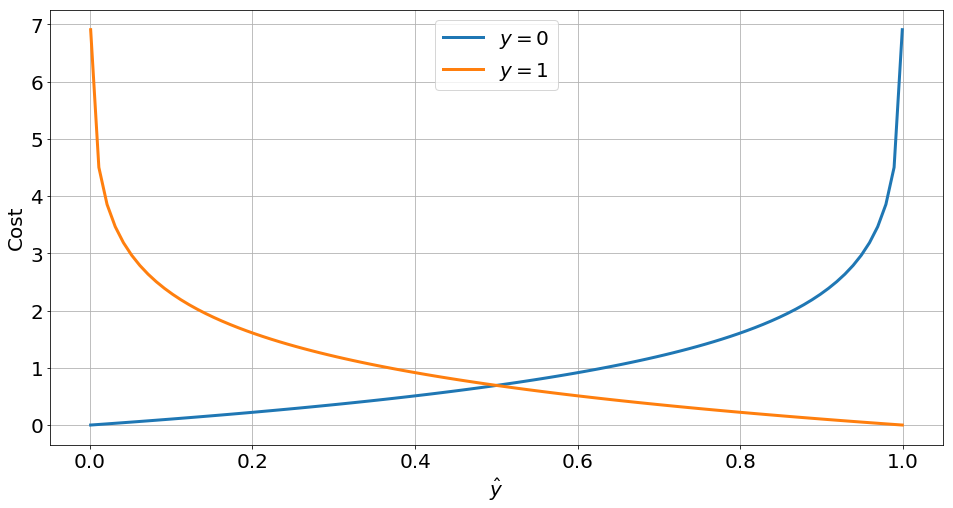

In [32]:
# Let's visualize our cost function values across a range of yhats
# softmax output values over the range (0, 1)
yhat = np.linspace(0.001, 0.999, 100)

#First the case if our label is 0
y = 0 
cost = - y*log(yhat) - (1-y)*log(1-yhat)
fig = figure(0, (16, 8))
ax = fig.add_subplot(111)
plot(yhat, cost, linewidth = 3)

#Now the case if our label is 1
y = 1 
cost = - y*log(yhat) - (1-y)*log(1-yhat)
plot(yhat, cost, linewidth = 3)
grid(1)

legend(['$y=0$', '$y=1$'], fontsize = 20)
xlabel('$\hat{y}$', fontsize = 20)
ylabel('Cost', fontsize = 20)
ax.tick_params(axis='both', which='major', labelsize=20)

- Not that when $\hat{y} = y$ our cost is zero, our cost increases as we move away from the correct label, and becomes very large as our prediction moves close to the completely wrong label. 
- Our model is penalized heavity when our predictions are very wrong. 

---

- Alright, so after all that work we know have a cost function derived from the principle of **maximum likelihood**:

$$
cost = - \sum_i y_i log(\hat{y_i})
$$

- This loss function is often refered to the **cross entropy**, this is a little bit of a misnomer:

"Many authors use the term "cross-entropy" to identify specifically the negative log-likelihood of a Bernoulli or softmax distribution, but that is a misnomer. Any loss consisting of a negative log-likelihood is a cross-entropy between the empirical distribution defited by the training set and the probability distribution defined by the model. For example, mean square error is the cross-entropy between the empirical distributionand a Guassian model." (Goodfellow et al section 5.5)

- Alright, let's put all of this together:

![](../graphics/binary_mnist_network_cross_entropy-01.png)

- Note that we don't have those annoying gradient-killing flat spots that we had in our mean square cost function above.
- Now, softmax will **saturate** just as a sigmoid activations functions do, however, the log form our cross entropy loss function has the nice effect of **reversing** the exponential in our softmax function, and making our cost function surface fairly linear, with a nice large downhill gradient. 
- Now, an importat question:

----

![](../graphics/question_one-01.png)

---

Alright, let's find out!

In [33]:
train_writer.close()
test_writer.close()
tf.reset_default_graph()
sess.close()

In [34]:
X = tf.placeholder(dtype = tf.float32, shape = (None, 28*28), name = 'X') 
y = tf.placeholder(dtype = tf.float32, shape = [None, 10], name = 'y') #One output dimension for each class

# Let's create a single fully connected layer with a sigmoid activation function
logits = tf.layers.dense(inputs = X, units = 10, activation = None, name = 'fc_1')
yhat = tf.nn.softmax(logits)

# Cross Entropy
# Implmenting cross entropy "manually" in tensoflow can be numerically unstable, so use this method:
cost = tf.losses.softmax_cross_entropy(y, logits)

# As we train, it will also be nice to keep track of the accuracy of our classifier
correct_prediction = tf.equal(tf.argmax(y, 1), tf.argmax(yhat, 1)) # Check if predictions are equal to labels
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32)) # Compute average accuracy

# Add Optimizer to Graph:
optimizer = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
train_op = optimizer.minimize(cost)

#Setup Summary Writing for Tensorboard:
tf.summary.scalar(name = 'cost', tensor = cost)
tf.summary.scalar(name = 'accuracy', tensor = accuracy)
merged_summary_op = tf.summary.merge_all() #Merges all summaries, in this case we only have one!

#Write tensorflow log file to tf_data directory:
train_writer = tf.summary.FileWriter(logdir = "../models/one_layer_cross_entropy_stochastic/train", graph = sess.graph)
test_writer = tf.summary.FileWriter(logdir = "../models/one_layer_cross_entropy_stochastic/test", graph = sess.graph)

In [35]:
#Setup a new session
sess = tf.InteractiveSession()
sess.run(tf.global_variables_initializer())

In [36]:
G = Generator(X = x_train, y = y_train, minibatch_size = minibatch_size) # Generator for training data
GT = Generator(X = x_test, y = y_test, minibatch_size = minibatch_size) # Generator for testing data

In [ ]:
num_iterations = 100000

for i in range(num_iterations):
    #Take Gradient Descent Step:
    G.generate()
    sess.run(train_op, feed_dict = {X: G.X, y: G.y})
    
    if i % 1000 == 0:
        summary = sess.run(merged_summary_op, feed_dict = {X: G.X, y: G.y})
        train_writer.add_summary(summary, i)
        train_writer.flush() #Go ahead and write to tfevent file so we can visualize as we train
        
        GT.generate()
        summary = sess.run(merged_summary_op, feed_dict = {X: GT.X, y: GT.y})
        test_writer.add_summary(summary, i)
        test_writer.flush()
        
        print(str(i), 'steps, ',  str(G.num_epochs),' epochs, test set accuracy = ', + accuracy.eval(feed_dict = {X: x_test, y: y_test}))

0 steps,  0  epochs, test set accuracy =  0.0788
1000 steps,  2  epochs, test set accuracy =  0.864
2000 steps,  4  epochs, test set accuracy =  0.8836
3000 steps,  6  epochs, test set accuracy =  0.8928
4000 steps,  8  epochs, test set accuracy =  0.8972
5000 steps,  10  epochs, test set accuracy =  0.9
6000 steps,  12  epochs, test set accuracy =  0.9034
7000 steps,  14  epochs, test set accuracy =  0.9059
8000 steps,  17  epochs, test set accuracy =  0.9064
9000 steps,  19  epochs, test set accuracy =  0.9082
10000 steps,  21  epochs, test set accuracy =  0.9089
11000 steps,  23  epochs, test set accuracy =  0.9104
12000 steps,  25  epochs, test set accuracy =  0.9113
13000 steps,  27  epochs, test set accuracy =  0.9122
14000 steps,  29  epochs, test set accuracy =  0.9137
15000 steps,  32  epochs, test set accuracy =  0.9133
16000 steps,  34  epochs, test set accuracy =  0.9136
17000 steps,  36  epochs, test set accuracy =  0.9147
18000 steps,  38  epochs, test set accuracy =  0.9

Your tensorboard visualization should look something like this:

![](../graphics/tensorboard_cross_entropy_vs_mse.png)

### Cross Entropy Cost Achieves Higher Performance *and* Converges Faster than MSE!

---

![](../graphics/spacer_small.png)

## **Now, let's stack some layers and see if we can crush some benchmarks**

![](../graphics/cartoon-01.png)

## **Training from Scripts**

- For these last experiments, we'll use a slightly different workflow. 
- The notebook is a great tool for lots of tasks, but when we want to compare a bunch of different deep learning models, I find that .py scripts work a bit better. 
- Instead of training in notebooks, we'll use a training script `train.py`
- To keep things organized, we'll define seprate `model.py` files in the models directory of thie repo. 
- Have a look at `models/five_layer_cross_entropy/model.py` for an example. 
- To keep things all in one place, we'll save our tensorboard data with in the same directory as our model file. 
- Before we get going, we'll make one last change, and switch from pure gradiet descent to the [Adam Optimizer](https://arxiv.org/pdf/1412.6980.pdf). 
- Adam is a very popular optimizer, and works well for lots of deep learning problems. Adam works by taking a running weighted average of the gradient and the second moment of the gradient. 
- To train our 5 layer model, run from the top level of this repo: 

```
python train.py -m five_layer_cross_entropy
```

- There's also a seven layer model:

```
python train.py -m seven_layer_cross_entropy
```

After running, you should see something like this in tensorboard:

![](../graphics/tensorboard_deeper_models.png)

- **Anything concerning about this plot?**
- As you may have noticed, we're overfitting!
- Now, we are acheiving our best test set accuracy thusfar, **around 97%**. 
- Now, this would be impressive, if Yann Lecun hadn't [beaten this performance](http://yann.lecun.com/exdb/mnist/) with a smaller network way back in 1998 with his **LeNet-5 network**, achieving a test set accuracy of **99.05%**. 
- So once again, it seems like there may be more to training deep networks than just stacking layers. 
- Also notice that our 7 layer network did a little worse out of sample than our 5 layer network.
- Next time, we'll have a look at Yann Lecun's LeNet-5 network.